<a href="https://colab.research.google.com/github/sreya-rc/TF2.0/blob/main/TF2_0_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install TensorFlow
try:
  %tensorflow_version 2.x # Colab only.
except Exception:
  pass

import tensorflow as tf
print(tf.__version__)

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.12.0


In [ ]:
# Additional imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [ ]:
# Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train/255.0, x_test /255.0
print("x_train.shape:", x_train.shape)

4422102/4422102 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [ ]:
# Data is only 2D!
# Convolution expects height x width x color
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print(x_train.shape)

(60000, 28, 28, 1)


In [ ]:
# Number of classes
K = len(set(y_train))
print("number of classes:", K)

number of classes: 10


In [ ]:
# Build the model using the functional API

i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [ ]:
# Compile and fit
# Note: make sure you use the GPU for this!
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 22s 6ms/step - loss: 0.5300 - accuracy: 0.8041 - val_loss: 0.4239 - val_accuracy: 0.8448
Epoch 2/15
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3675 - accuracy: 0.8613 - val_loss: 0.3660 - val_accuracy: 0.8649
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3201 - accuracy: 0.8791 - val_loss: 0.3339 - val_accuracy: 0.8766
Epoch 4/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2859 - accuracy: 0.8918 - val_loss: 0.3173 - val_accuracy: 0.8801
Epoch 5/15
1875/1875 [==============================] - 15s 8ms/step - loss: 0.2624 - accuracy: 0.9009 - val_loss: 0.3074 - val_accuracy: 0.8895
Epoch 6/15
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2389 - accuracy: 0.9087 - val_loss: 0.2899 - val_accuracy: 0.8980
Epoch 7/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2229 - accuracy: 0.9158 - val_loss: 0.3124 - val_accu

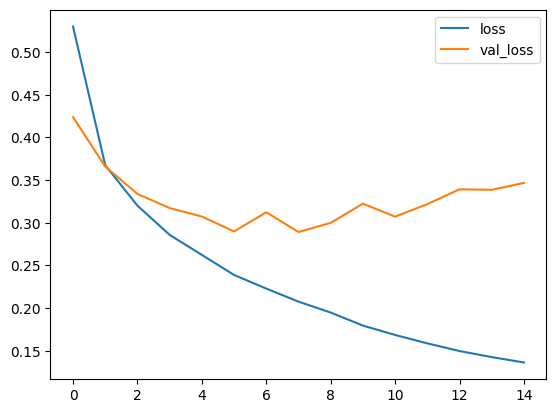

In [ ]:
# Plot loss per iteration
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

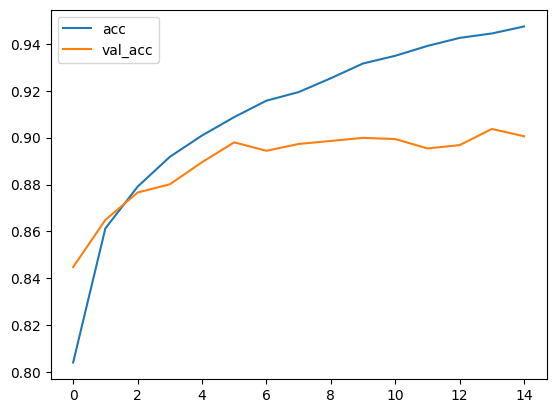

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 [==============================] - 1s 3ms/step
Confusion matrix, without normalization
[[828   1  28  21   2   1 116   0   3   0]
 [  2 975   0  14   3   0   6   0   0   0]
 [ 10   0 852  12  52   0  74   0   0   0]
 [ 14   4  11 923  21   3  23   0   1   0]
 [  1   1  54  31 838   0  75   0   0   0]
 [  0   0   0   0   0 968   0  22   1   9]
 [ 98   1  52  27  87   0 728   0   7   0]
 [  0   0   0   0   0  12   0 959   0  29]
 [  9   1   3   4   2   2   9   1 967   2]
 [  1   0   0   0   0   6   0  25   0 968]]


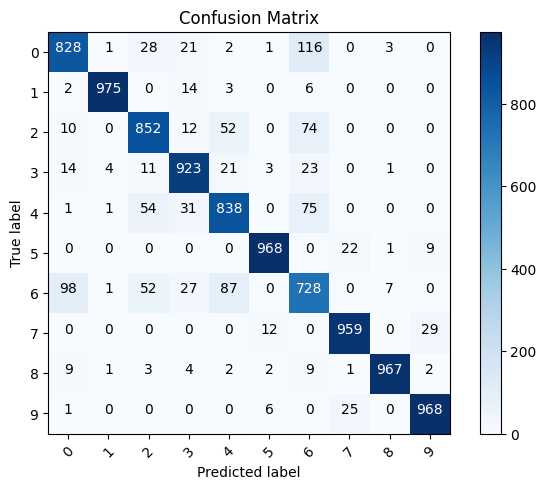

In [ ]:
# Plot confusion matrix

# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title="Confusion Matrix",
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting 'normalize=True'.
  """

  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized Confusion Matrix")
  else:
    print("Confusion matrix, without normalization")

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [ ]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

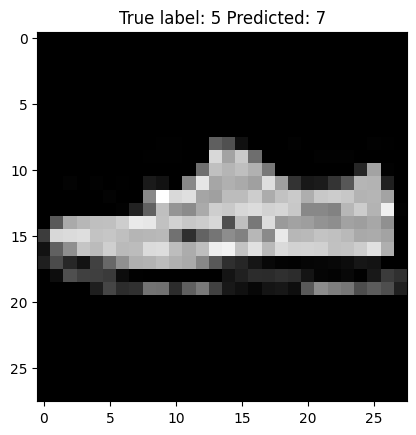

In [ ]:
# Show some misclassified samples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));   # Show true label vs. what it was mistaken as